In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from cluster_util.spark_util import SparkUtil
from cluster_util.hive_util import HiveUtil

In [8]:
spark = SparkUtil().build_spark_session(app_name="Shared Bike Analysis System notebook")

2021-11-24 16:14:29,050	File "spark_util.py", line 25	INFO: Build spark session ...
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/11/24 16:14:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [9]:
spark.sql('show databases').show()

+----------+
| namespace|
+----------+
|   default|
|sharedbike|
+----------+



In [10]:
spark.sql('use sharedbike')
spark.sql('show tables').show()

+----------+------------+-----------+
| namespace|   tableName|isTemporary|
+----------+------------+-----------+
|sharedbike|trip_details|      false|
+----------+------------+-----------+



In [11]:
ptd="2021"
desc_list_names = ['duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'plan_duration',  'trip_route_type',
                               'passholder_type', 'bike_type', 'distance', 'season', 'holiday', 'workingday']
df_by_year = spark.sql('select {} from trip_details where ptd={};'.format(','.join(desc_list_names), ptd))

In [12]:
df_by_year.toPandas().describe().T

,count,mean,std,min,25%,50%,75%,max
duration,153989.0,41.147673,98.049854,1.000000,9.000000,19.000000,37.000000,1440.000000
start_lat,153989.0,34.029836,0.038370,33.928459,33.996239,34.038609,34.050880,34.186569
start_lon,153989.0,-118.345096,0.096136,-118.491341,-118.451248,-118.291496,-118.258537,-118.225410
end_lat,153989.0,34.029810,0.038001,33.928459,33.998341,34.037460,34.050480,34.186569
end_lon,153989.0,-118.345834,0.096722,-118.491341,-118.451248,-118.291718,-118.258537,-118.225410
plan_duration,153989.0,48.578457,102.870918,1.000000,1.000000,30.000000,30.000000,999.000000
trip_route_type,153989.0,1.243537,0.429218,1.000000,1.000000,1.000000,1.000000,2.000000
passholder_type,153988.0,2.317849,1.024294,1.000000,1.000000,3.000000,3.000000,4.000000
bike_type,153989.0,1.278773,0.471785,1.000000,1.000000,1.000000,2.000000,3.000000
distance,153989.0,29.592955,35.449078,0.000000,4.025301,20.554560,41.013824,517.316467


In [55]:
spark.stop()

In [13]:
trip_data_by_year_df = pd.read_csv('results/trip_details/part-00000-3efc457b-4c9c-411e-9f02-ea912baea6a6-c000.csv')

In [11]:
trip_data_by_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153989 entries, 0 to 153988
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   trip_id          153989 non-null  int64  
 1   duration         153989 non-null  int64  
 2   start_station    153989 non-null  int64  
 3   start_lat        153989 non-null  float64
 4   start_lon        153989 non-null  float64
 5   end_station      153989 non-null  int64  
 6   end_lat          153989 non-null  float64
 7   end_lon          153989 non-null  float64
 8   bike_id          153981 non-null  float64
 9   plan_duration    153989 non-null  int64  
 10  trip_route_type  153989 non-null  int64  
 11  passholder_type  153988 non-null  float64
 12  bike_type        153989 non-null  int64  
 13  distance         153989 non-null  float64
 14  distance_cal     153989 non-null  float64
 15  used_date        153989 non-null  object 
 16  season           153989 non-null  int6

In [14]:
trip_data_by_year_df.head(3)

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,...,distance_cal,used_date,used_hour,season,holiday,workingday,start_datetime,end_datetime,start_hour,ptd
0,155146002,25,4510,34.077351,-118.264549,3026,34.063179,-118.245880,16826.0,1,...,2.206,3/13/2021,12,1,0,0,2021-03-13T12:35:00.000-08:00,2021-03-13T13:00:00.000-08:00,2021-03-13 12:00:00,2021
1,155146874,69,4479,34.031502,-118.288742,4509,34.101639,-118.309174,6450.0,1,...,4.339,3/13/2021,12,1,0,0,2021-03-13T12:35:00.000-08:00,2021-03-13T13:44:00.000-08:00,2021-03-13 12:00:00,2021
2,155146873,68,4545,33.958790,-118.448280,4543,33.957180,-118.451248,16164.0,1,...,0.341,3/13/2021,12,1,0,0,2021-03-13T12:35:00.000-08:00,2021-03-13T13:43:00.000-08:00,2021-03-13 12:00:00,2021


In [15]:
trip_data_by_year_df[['duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'plan_duration',  'trip_route_type',
                               'passholder_type', 'bike_type', 'distance', 'season', 'holiday', 'workingday']].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,153989.0,41.147673,98.049854,1.000000,9.000000,19.000000,37.000000,1440.000000
start_lat,153989.0,34.029836,0.038370,33.928459,33.996239,34.038609,34.050880,34.186569
start_lon,153989.0,-118.345096,0.096136,-118.491341,-118.451248,-118.291496,-118.258537,-118.225410
end_lat,153989.0,34.029810,0.038001,33.928459,33.998341,34.037460,34.050480,34.186569
end_lon,153989.0,-118.345834,0.096722,-118.491341,-118.451248,-118.291718,-118.258537,-118.225410
plan_duration,153989.0,48.578457,102.870918,1.000000,1.000000,30.000000,30.000000,999.000000
trip_route_type,153989.0,1.243537,0.429218,1.000000,1.000000,1.000000,1.000000,2.000000
passholder_type,153988.0,2.317849,1.024294,1.000000,1.000000,3.000000,3.000000,4.000000
bike_type,153989.0,1.278773,0.471785,1.000000,1.000000,1.000000,2.000000,3.000000
distance,153989.0,29.592954,35.449079,0.000000,4.025301,20.554560,41.013824,517.316470


<AxesSubplot:xlabel='workingday', ylabel='count'>

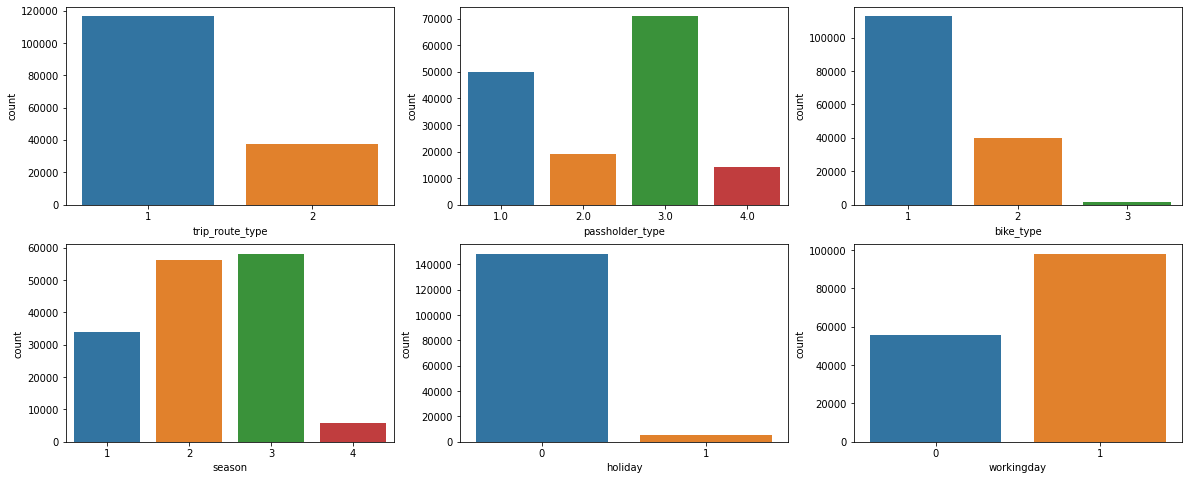

In [16]:
# countplot in categorical variable
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(20, 8)

# col_name = ['trip_route_type', 'passholder_type', 'bike_type', 'season', 'holiday', 'workingday']

sns.countplot(trip_data_by_year_df['trip_route_type'], ax=axes[0][0])
sns.countplot(trip_data_by_year_df['passholder_type'], ax=axes[0][1])
sns.countplot(trip_data_by_year_df['bike_type'], ax=axes[0][2])
sns.countplot(trip_data_by_year_df['season'], ax=axes[1][0])
sns.countplot(trip_data_by_year_df['holiday'], ax=axes[1][1])
sns.countplot(trip_data_by_year_df['workingday'], ax=axes[1][2])

<AxesSubplot:xlabel='season', ylabel='ptd'>

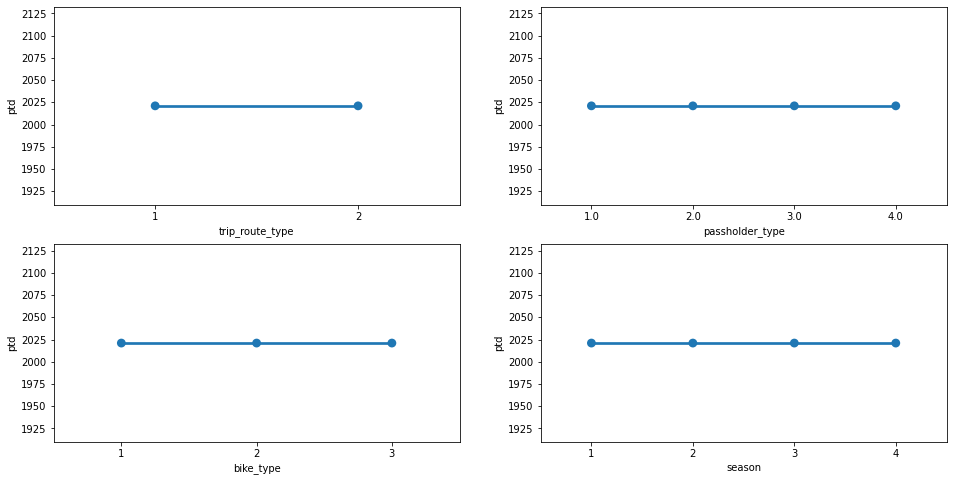

In [17]:
# pointplot in categorical variable
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,8)

sns.pointplot(data=trip_data_by_year_df, x='trip_route_type', y='ptd', ax=axes[0][0])
sns.pointplot(data=trip_data_by_year_df, x='passholder_type', y='ptd', ax=axes[0][1])
sns.pointplot(data=trip_data_by_year_df, x='bike_type', y='ptd', ax=axes[1][0])
sns.pointplot(data=trip_data_by_year_df, x='season', y='ptd', ax=axes[1][1])

# sns.pointplot(data=trip_data_by_year, x='trip_route_type', ax=axes[0][0])
# sns.pointplot(data=trip_data_by_year, x='passholder_type', ax=axes[0][1])
# sns.pointplot(data=trip_data_by_year, x='bike_type', ax=axes[0][2])
# sns.pointplot(data=trip_data_by_year, x='season', ax=axes[1][0])
# sns.pointplot(data=trip_data_by_year, x='holiday', ax=axes[1][1])
# sns.pointplot(data=trip_data_by_year, x='workingday', ax=axes[1][2])

In [20]:
# app_trip_cnt_by_hour
app_trip_cnt_by_hour_df = pd.read_csv('results/app/app_trip_cnt_by_hour/part-00000-dd2e4669-3cb2-4879-a832-752f6b98087b-c000.csv')

In [21]:
app_trip_cnt_by_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   start_hour                        6046 non-null   object
 1   used_count                        6046 non-null   int64 
 2   total_duration                    6046 non-null   int64 
 3   plan_duration_day_count           6046 non-null   int64 
 4   plan_duration_month_count         6046 non-null   int64 
 5   plan_duration_year_count          6046 non-null   int64 
 6   trip_route_type_one_way_count     6046 non-null   int64 
 7   trip_route_type_round_trip_count  6046 non-null   int64 
 8   passholder_type_walk_up_count     6046 non-null   int64 
 9   passholder_type_one_day_count     6046 non-null   int64 
 10  passholder_type_monthly_count     6046 non-null   int64 
 11  passholder_type_annual_count      6046 non-null   int64 
 12  bike_type_standard_c

In [22]:
app_trip_cnt_by_hour_df.head(3)

,start_hour,used_count,total_duration,plan_duration_day_count,plan_duration_month_count,plan_duration_year_count,trip_route_type_one_way_count,trip_route_type_round_trip_count,passholder_type_walk_up_count,passholder_type_one_day_count,passholder_type_monthly_count,passholder_type_annual_count,bike_type_standard_count,bike_type_electric_count,bike_type_smart_count,season,holiday,workingday
0,2021-01-01-01,1,17,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,2021-01-01-02,1,7,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0
2,2021-01-01-04,2,216,1,1,0,2,0,1,0,1,0,2,0,0,1,1,0


In [23]:
app_trip_cnt_by_hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
used_count,6046.0,25.469567,20.707366,1.0,6.00,22.0,40.0,142.0
total_duration,6046.0,1048.013397,1141.688522,1.0,160.25,684.0,1555.0,10524.0
plan_duration_day_count,6046.0,11.339563,11.908931,0.0,2.00,7.0,17.0,79.0
plan_duration_month_count,6046.0,11.736189,9.372877,0.0,3.00,11.0,18.0,112.0
plan_duration_year_count,6046.0,2.393649,2.627686,0.0,0.00,2.0,4.0,19.0
trip_route_type_one_way_count,6046.0,19.266788,15.579677,0.0,5.00,17.0,30.0,130.0
trip_route_type_round_trip_count,6046.0,6.202779,6.332285,0.0,1.00,4.0,10.0,48.0
passholder_type_walk_up_count,6046.0,8.279854,8.759412,0.0,1.00,5.0,12.0,60.0
passholder_type_one_day_count,6046.0,3.134138,4.248490,0.0,0.00,1.5,5.0,35.0
passholder_type_monthly_count,6046.0,11.735528,9.371976,0.0,3.00,11.0,18.0,112.0


<AxesSubplot:xlabel='holiday', ylabel='used_count'>

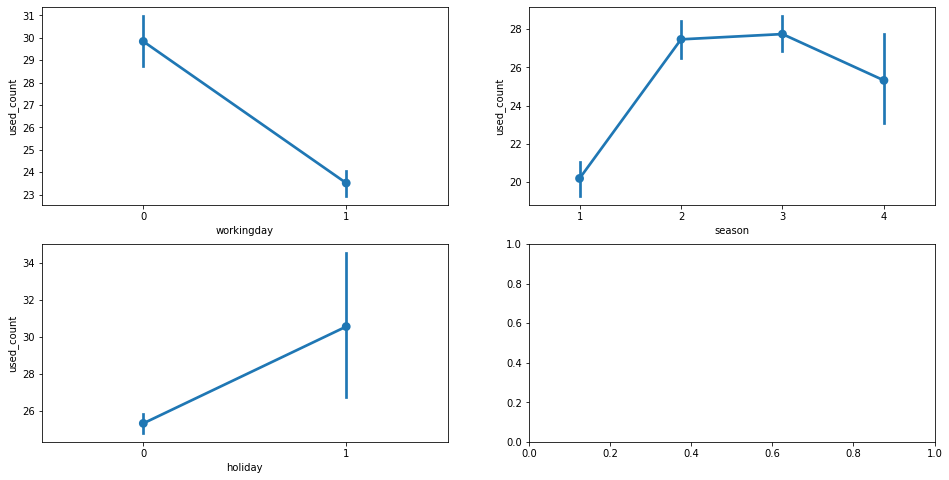

In [25]:
# pointplot in categorical variable
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,8)

sns.pointplot(data=app_trip_cnt_by_hour_df, x='workingday', y='used_count', ax=axes[0][0])
sns.pointplot(data=app_trip_cnt_by_hour_df, x='season', y='used_count', ax=axes[0][1])
sns.pointplot(data=app_trip_cnt_by_hour_df, x='holiday', y='used_count', ax=axes[1][0])

In [15]:
# 查看缺失值情况
trip_data_by_year_df.isna().sum()

trip_id            0
duration           0
start_station      0
start_lat          0
start_lon          0
end_station        0
end_lat            0
end_lon            0
bike_id            8
plan_duration      0
trip_route_type    0
passholder_type    1
bike_type          0
distance           0
distance_cal       0
used_date          0
used_hour          0
season             0
holiday            0
workingday         0
start_datetime     0
end_datetime       0
start_hour         0
ptd                0
dtype: int64

In [16]:
from sklearn.cluster import KMeans
from sklearn import cluster
cluster.DBSCAN().get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

In [23]:
coordinate_data = trip_data_by_year_df.loc[:,['start_lon','start_lat']]

In [29]:
coordinate_data.head(3)

,start_lon,start_lat
0,-118.264549,34.077351
1,-118.288742,34.031502
2,-118.448280,33.958790


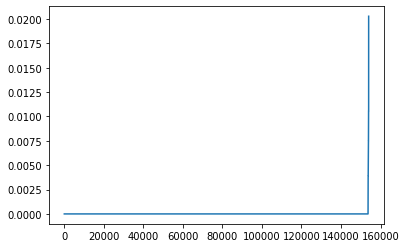

In [30]:
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

parking_min_bikes = 50
min_neighbors = 50
nbrs = NearestNeighbors(n_neighbors=parking_min_bikes).fit(coordinate_data)  #找到距离最近的50个点
distances, indices = nbrs.kneighbors(coordinate_data)  #计算每个点最近的50个点的距离
dist = distances[:, (min_neighbors-1)]
dist_ = np.sort(dist)
plt.plot(dist_)

count:
8      28272
10     11845
9      11539
22      7828
11      6147
       ...  
88       102
66        74
105       67
85        59
90        57
Length: 112, dtype: int64
DBI=0.5711242286299573


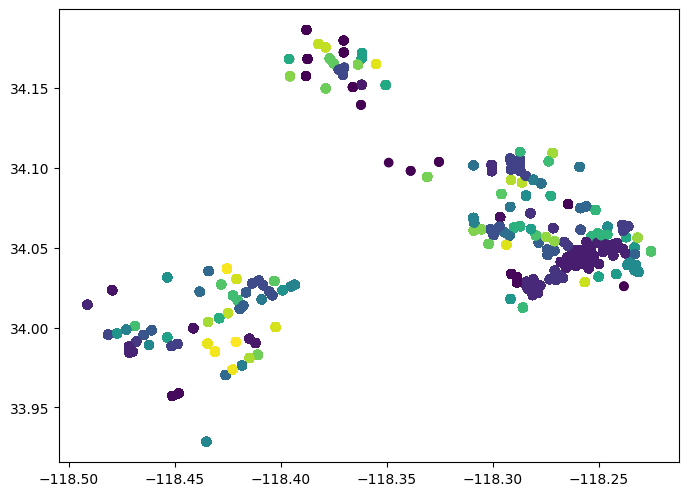

In [53]:
mdl_dbscan = cluster.DBSCAN(eps=0.004, min_samples=parking_min_bikes).fit(coordinate_data) # 聚类模型
# 模型预测的结果有多少个类，每个类有多少个样本
count = pd.Series(mdl_dbscan.labels_).value_counts()  # 展示有多少类，每类有多少个样本，即查看各个类别上的个数
print('count:')
print('{}'.format(count))

plt.figure()
plt.scatter(x='start_lon', y='start_lat', data=coordinate_data, c=mdl_dbscan.labels_)
# 聚类模型有两种评价模型，一种是组内距离越小越好，一种是组间距离越大越好 （组：类别）
DBI = metrics.davies_bouldin_score(coordinate_data, mdl_dbscan.labels_)
print('DBI={}'.format(DBI)) # 聚类模型评价指标

In [44]:
cluster_cnt = 3

from sklearn.cluster import KMeans
# 模型建立
mdl_kmeans = KMeans(n_clusters=cluster_cnt).fit(coordinate_data)
print(mdl_kmeans)

KMeans(n_clusters=3)


In [45]:
# 统计每个类的个数
count2 = pd.Series(mdl_kmeans.labels_).value_counts()
print(count2)

0    70632
1    64305
2    19052
dtype: int64


In [46]:
# 每个类中的坐标
km_centor = pd.DataFrame(mdl_kmeans.cluster_centers_, columns=['start_lon','start_lat'])
print(km_centor)

    start_lon  start_lat
0 -118.257872  34.046162
1 -118.454210  33.994614
2 -118.300176  34.088188


In [47]:
# 类中心
mdl_kmeans.cluster_centers_

array([[-118.25787229,   34.04616221],
       [-118.45421036,   33.99461444],
       [-118.30017626,   34.08818783]])

In [48]:
# 数量最多的十个类中心点
center_10=list(count2.index[:10])
center_10_cordinate=[]
for index in center_10:
    cordinate=mdl_kmeans.cluster_centers_[index]
    print(cordinate)
    center_10_cordinate.append(cordinate)

[-118.25787229   34.04616221]
[-118.45421036   33.99461444]
[-118.30017626   34.08818783]


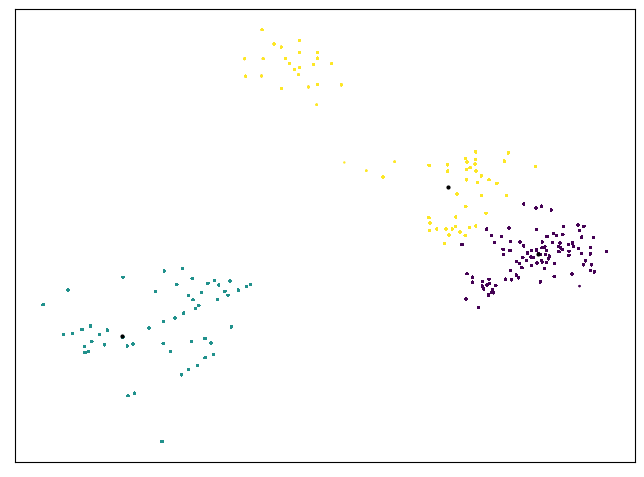

In [49]:
plt.rcParams['savefig.dpi'] = 300 # 像素
plt.rcParams['figure.dpi'] = 100 # 分辨率
plt.rcParams['figure.figsize']=(8.0, 6.0) # 图片大小比例
plt.figure()
plt.scatter(x='start_lon', y='start_lat', data=coordinate_data, c=mdl_kmeans.labels_, s=0.5) 
plt.scatter(x='start_lon', y='start_lat', data=km_centor, c='k', s=4)
plt.scatter(x='start_lon', y='start_lat', data=center_10_cordinate, c='r', marker='*', s=20)
# plt.savefig('mobike.png')